In [306]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15, 3)
plt.style.use('ggplot')

In [307]:
alpha = 5
beta = 2
n = 10
k = 8

In [308]:
def propose_jump(pi, sigma):
    value = stats.norm.rvs(loc=pi, scale=sigma)
    return value
    # return max(0, min(1, value))

In [309]:
# def plot_random_walk(sigma):
#     random_start = np.random.rand()
#     chain = [random_start]
#     sigma = 0.2
#     for i in range(1_000):
#         chain.append(propose_jump(chain[-1], sigma))
#     plt.plot(chain)

In [310]:
# plot_random_walk(0.2)
# plot_random_walk(0.2)
# plot_random_walk(0.2)

In [320]:
def decide(pi, pi2, alpha, beta, n, k, debug=False):
    # evaluate prior and likelihood
    prior1 = stats.beta.pdf(pi, alpha, beta)
    prior2 = stats.beta.pdf(pi2, alpha, beta)
    likelihood1 = stats.binom.pmf(n=n, k=k, p=pi)
    likelihood2 = stats.binom.pmf(n=n, k=k, p=pi2)

    # define alpha
    alpha = min(1, prior2 / prior1 * likelihood2 / likelihood1)
    if debug: print("pi = {:.5f}, pi2 = {:.5f}, alpha = {:.5f}".format(pi, pi2, alpha))

    # jump decision
    p = np.random.rand()
    if p <= alpha and 0 < pi2 < 1:
        return pi2
    else:
        return pi

pi = 0.2
pi2 = propose_jump(pi, sigma=0.2)
decide(pi, pi2, alpha, beta, n, k, debug=True)

pi = 0.20000, pi2 = 0.38273, alpha = 1.00000


0.38273294659625207

In [319]:
def metropolis_chain(n_steps, alpha, beta, n, k, sigma):
    pi = np.random.rand()
    chain = [pi]

    for i in range(n_steps):
        pi2 = propose_jump(chain[-1], sigma)
        chain.append(decide(chain[-1], pi2, alpha, beta, n, k))
    return chain

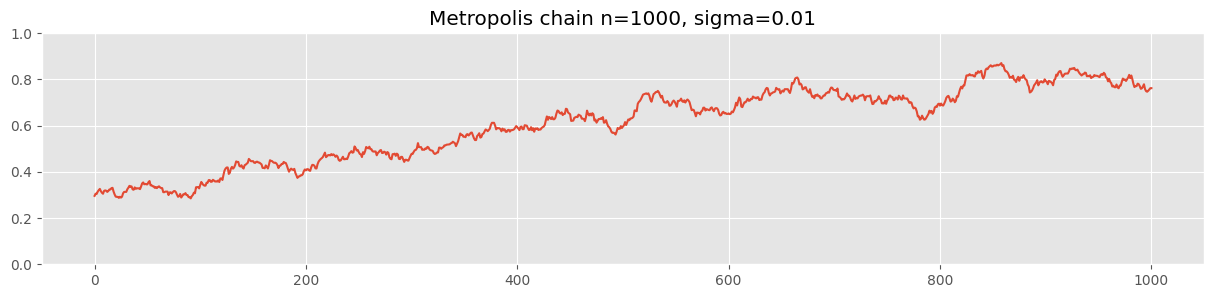

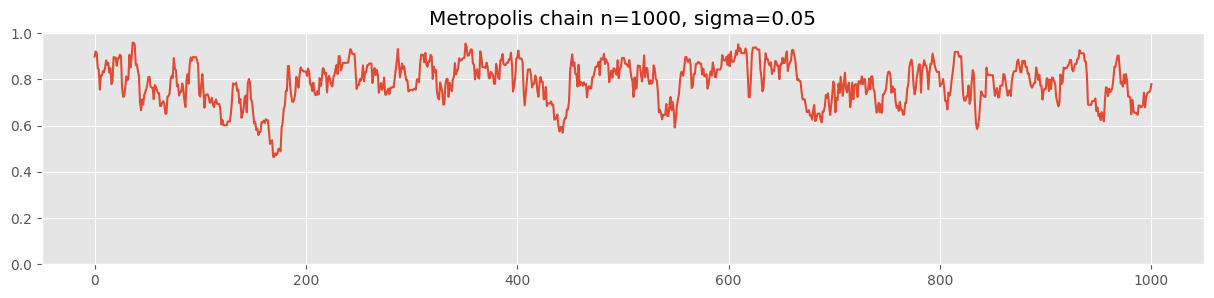

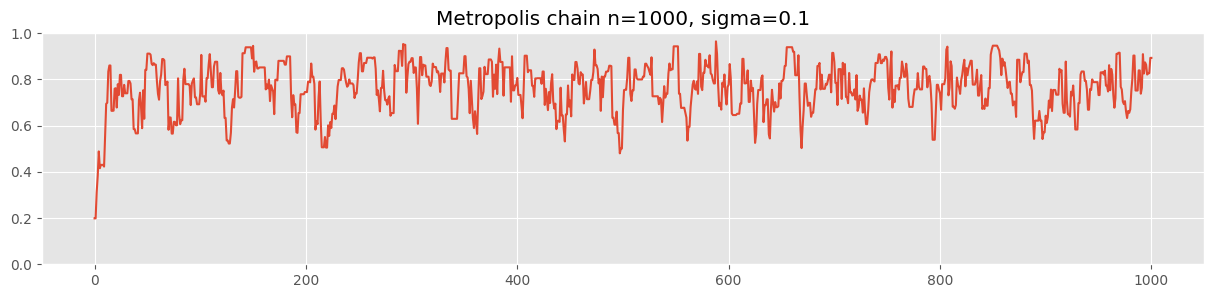

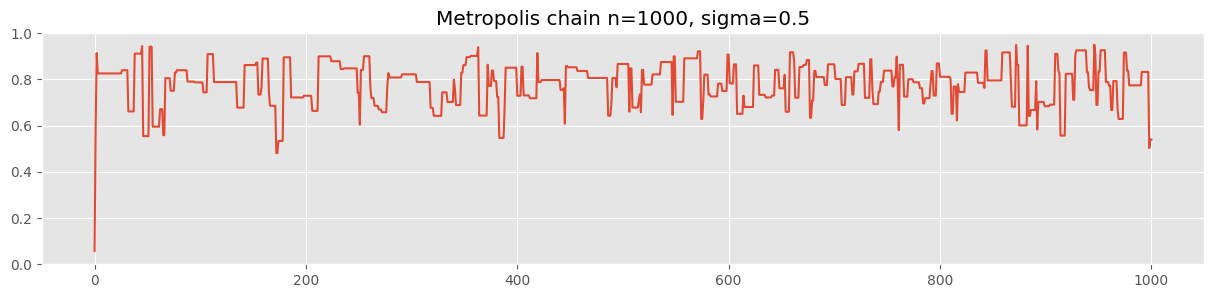

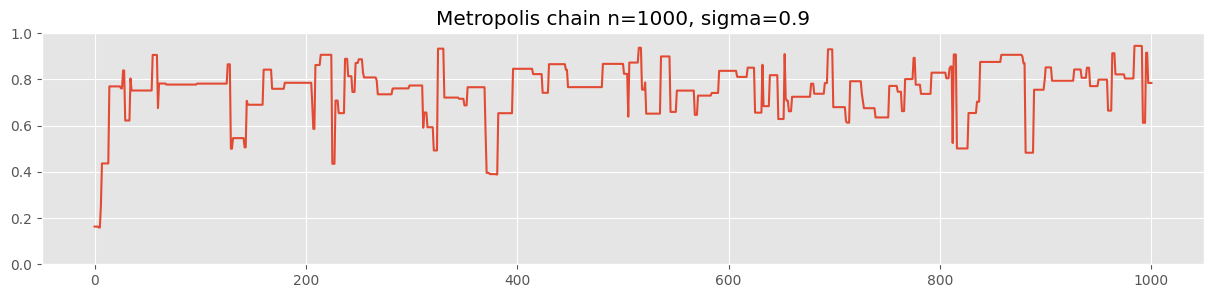

In [341]:
def plot_metropolis_chain(n_steps, alpha, beta, n, k, sigma):
    chain = metropolis_chain(n_steps, alpha, beta, n, k, sigma)
    plt.plot(chain)
    plt.ylim(0, 1)
    plt.title(f'Metropolis chain n={n_steps}, sigma={sigma}')
    plt.show()

plot_metropolis_chain(1_000, alpha, beta, n, k, 0.01)
plot_metropolis_chain(1_000, alpha, beta, n, k, 0.05)
plot_metropolis_chain(1_000, alpha, beta, n, k, 0.1)
plot_metropolis_chain(1_000, alpha, beta, n, k, 0.5)
plot_metropolis_chain(1_000, alpha, beta, n, k, 0.9)

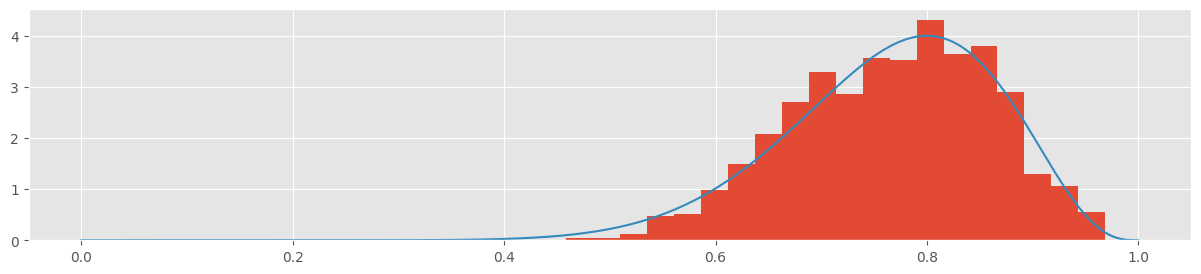

In [357]:
chain = metropolis_chain(1_000, alpha, beta, n, k, 0.1)
plt.hist(chain, density=True, bins=20)


pi_range = np.linspace(0, 1, 1000)
true_posterior = [stats.beta.pdf(pi, alpha+k, beta+n-k) for pi in pi_range]
plt.plot(pi_range, true_posterior)